<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/MNIST_Bootcamp_1805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


In [5]:
num_labels = len(np.unique(y_train))
num_labels

10

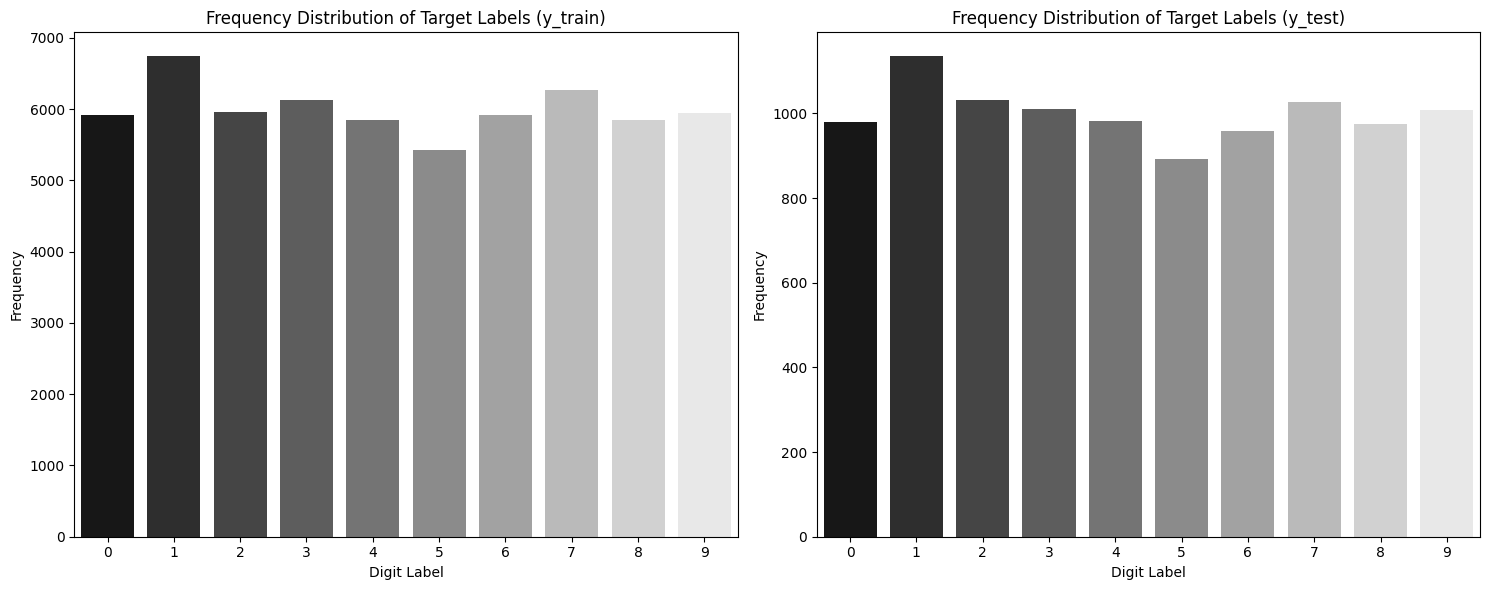

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

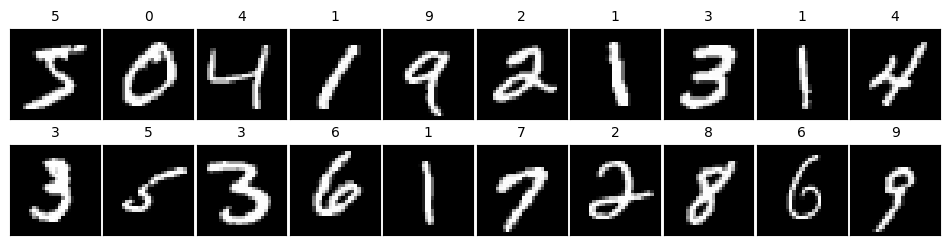

In [7]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01},
                             squeeze=True)

    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)

    plt.tight_layout()
    plt.show()

visualize_images(x_train)

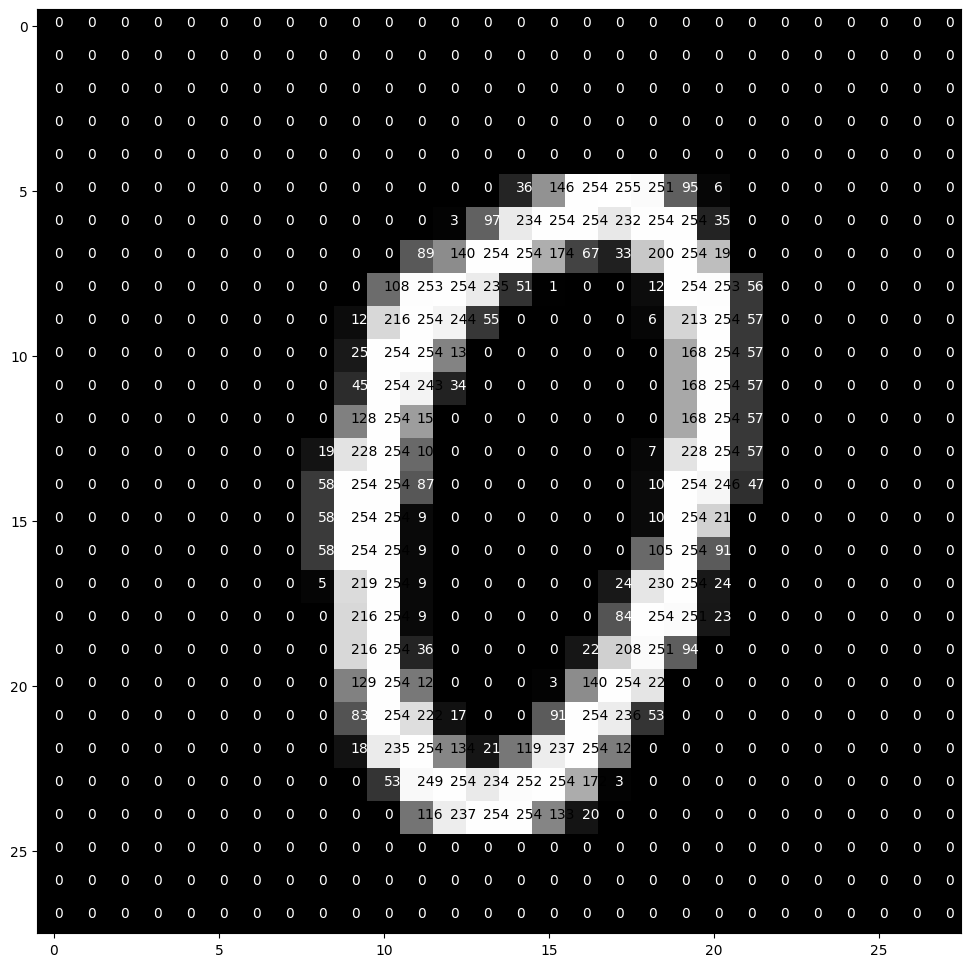

In [8]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    threshold = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                       color='white' if img [x][y]<threshold else 'black')

pixel_visualize(x_train[1000])

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [14]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,266 (3.40 MB)

 Trainable params: 891,050 (3.40 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [17]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [18]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(datagen.flow(x_train, y_train, batch_size=512), epochs=5,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.5542 - loss: 1.5713 - precision: 0.6373 - recall: 0.4932 - val_accuracy: 0.2451 - val_loss: 3.1114 - val_precision: 0.3070 - val_recall: 0.0070
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9064 - loss: 0.2978 - precision: 0.9273 - recall: 0.8896 - val_accuracy: 0.4056 - val_loss: 3.2270 - val_precision: 0.4993 - val_recall: 0.2184
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9385 - loss: 0.2048 - precision: 0.9500 - recall: 0.9290 - val_accuracy: 0.4880 - val_loss: 2.1848 - val_precision: 0.5711 - val_recall: 0.4340
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9512 - loss: 0.1569 - precision: 0.9605 - recall: 0.9442 - val_accuracy: 0.7729 - val_loss: 0.6658 - val_precision: 0.8211 - val_recall: 0.7389
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9581 - loss: 0.1366 - precision: 0.9644 - recall: 0.9524 - val_accuracy: 0.9475 - val_loss: 0.

In [19]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [20]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       980
           1       0.98      0.99      0.99      1135
           2       1.00      0.92      0.96      1032
           3       0.89      1.00      0.94      1010
           4       0.91      1.00      0.95       982
           5       0.96      0.97      0.97       892
           6       0.99      0.94      0.96       958
           7       0.92      1.00      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.86      0.96      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



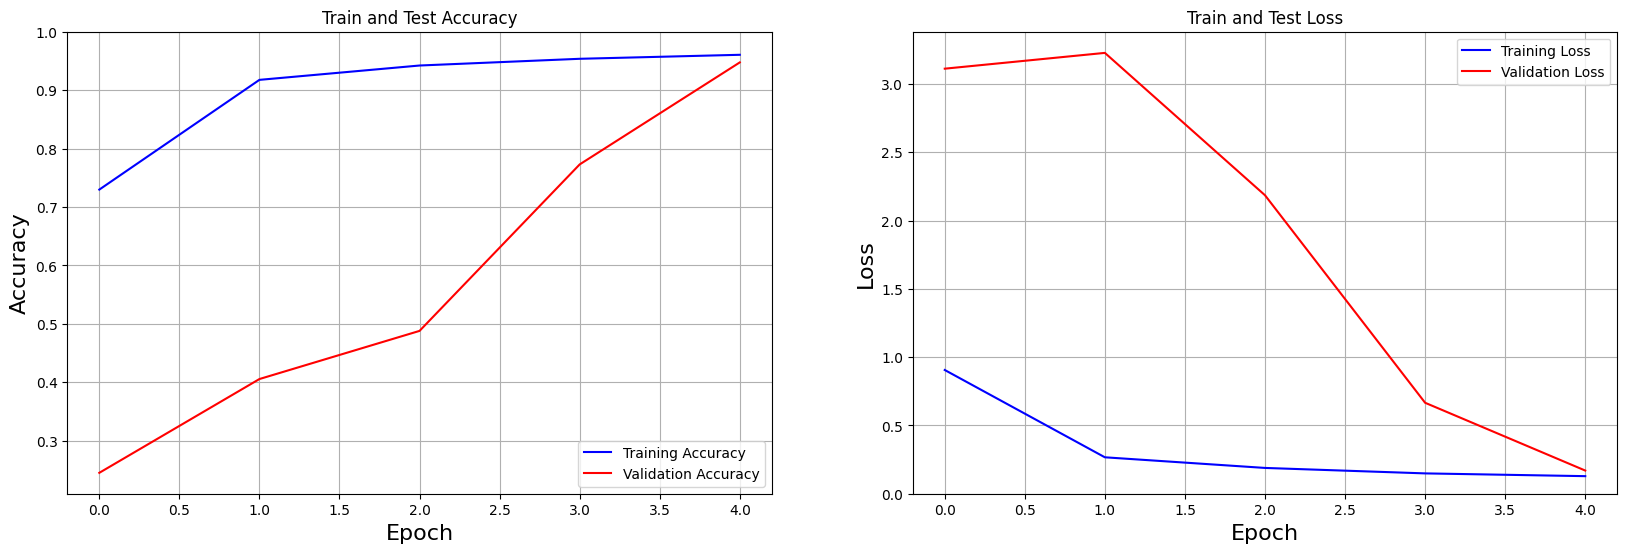

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Train and Test Loss')
plt.grid(True)
plt.show()

In [22]:
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=False)
print('Test Accuracy: ', acc)
print('Test Loss: ', loss)
print('Test Precision: ', precision)
print('Test Recall: ', recall)

Test Accuracy:  0.9474999904632568
Test Loss:  0.16960586607456207
Test Precision:  0.9652137756347656
Test Recall:  0.9322999715805054


In [23]:
model.save('mnist_model.h5')

In [29]:
import random
random = random.randint(0, x_test.shape[0])
random

8078

In [30]:
test_image = x_test[random]
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

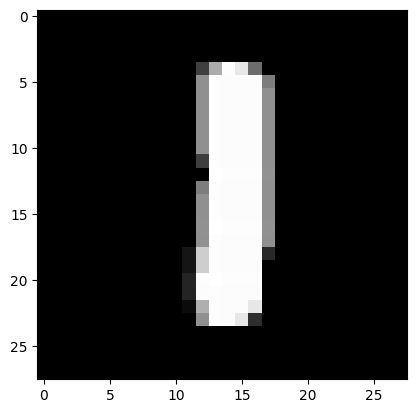

In [31]:
plt.imshow(test_image.reshape(28,28), cmap='gray');

In [32]:
test_data = x_test[random].reshape(1,28,28,1)
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[2.51687325e-05, 9.77822483e-01, 2.15620039e-05, 3.02497833e-03,
        6.89722924e-03, 6.58538484e-04, 3.47929861e-04, 1.01170605e-02,
        7.49921237e-05, 1.01002853e-03]], dtype=float32)

In [33]:
predicted_classes = np.argmax(probability)
predicted_classes

np.int64(1)

In [34]:
model.save('my_model.h5')